In [27]:
from numpy import array,zeros, sin,linspace,nanmin,where
from printSoln import *
import run_kut4 as runkut
from euler0 import *
import pylab as pl
import scipy
from scipy import integrate
import time

# Question 1

First part is done by replacing this bit:

def integrate(F,x,y,xStop,h):

    def run_kut4(F,x,y,h):
    
        K0 = h*F(x,y)
        
        K1 = h*F(x + h/2.0, y + K0/2.0)
        
        K2 = h*F(x + h/2.0, y + K1/2.0)
        
        K3 = h*F(x + h, y + K2)
        
            return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
            
With this:

def integrate0(F,x,y,xStop,h):

    def euler(F,x,y,h):
    
        K0 = h*F(x,y)
        
        return K0

It's been saved as euler0.

Honestly I have no idea how this was done but it might make sense if we look at the slides

In [21]:
#Define the function by putting into an array as so: 

def fb(x,y):
    f=zeros(2)
    f[0]=y[1]
    f[1]=-y[0]
    return f

In [22]:
#x = lower limit of the integral
#xstop = upper limit of the integral
#y = array of the initial conditions ( y(0)=0 & y'(0)=1 )
#h = step size (I dunno, it's in the slides somewhere. I think.)
#freq = I dunno but it's usually 1 so just roll with it.

x = 0.0 # Start of integration
xStop = 20.0 # End of integration
y = array([0., 1.]) # Initial values of {y,y’}
h1 = 0.1 # Step size
freq = 1 # Printout frequency

In [15]:
#This integrates using the Euler code but pretty much the same for RK4 too. Question is solved using both.
#There's also a timer whacked on to each to compare how long each takes as a higher h values means longer time to calculate.

#Euler
start0=time.time()

X0,Y0 = integrate0(fb,x,y,xStop,h1)
#printSoln(X0,Y0,freq)

end0=time.time()

errorEuler = sin(X0)-Y0[:,0] # Error is just the true value-the value given (both are arrays of numbers for the integral)

In [16]:
#Runge-Kutta 4th order
start1=time.time()

X1,Y1=runkut.integrate(fb,x,y,xStop,h1)
#printSoln(X1,Y1,freq)

end1=time.time()

errorRK4 = sin(X0)-Y1[:,0]

In [19]:
#Euler again with a smaller h
h2 = 0.001 # Step size

start2=time.time()

X2,Y2 = integrate0(fb,x,y,xStop,h2)
#printSoln(X2,Y2,freq)

end2=time.time()

errorEuler2 = sin(X2)-Y2[:,0]

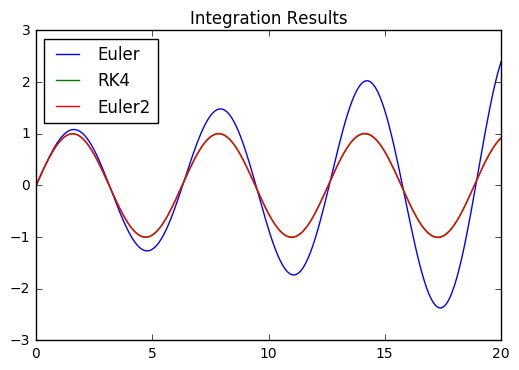

In [18]:
pl.plot(X0,Y0[:,0], label='Euler')
pl.plot(X1,Y1[:,0], label='RK4')
pl.plot(X2,Y2[:,0], label='Euler2')
pl.legend(loc='best')
pl.title('Integration Results')
pl.show()

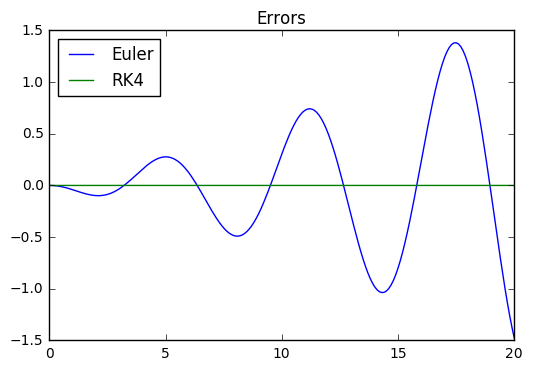

In [8]:
pl.title('Errors')
pl.plot(X0,errorEuler, label='Euler')
pl.plot(X0,errorRK4, label='RK4')
pl.legend(loc='best')
pl.show()

Clearly, the errors of the Euler method with step size of h = 0.1
are unacceptably large. In order to decrease them to acceptable
level (almost indistinguishable from the RK4 method errors) we
need h = 0.001 as previously calculated.

Method Times:
Euler h=0.1 - 0.00100016593933    RK4 h=0.1 - 0.00600004196167    Euler h=0.001 - 0.111000061035


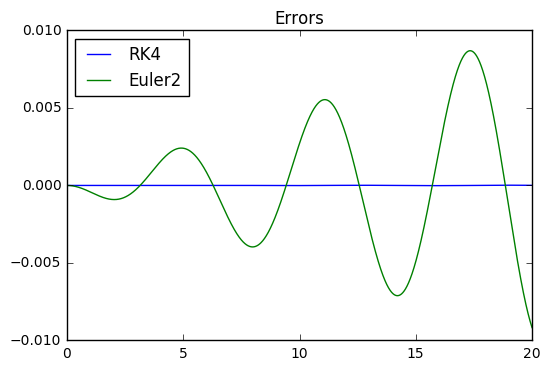

In [9]:
print 'Method Times:'
print 'Euler h=0.1 -', end0-start0, '   RK4 h=0.1 -', end1-start1, '   Euler h=0.001 -', end2-start2

pl.title('Errors')
pl.plot(X0,errorRK4, label='RK4')
pl.plot(X2,errorEuler2, label='Euler2')
pl.legend(loc='best')
pl.show()

However, we note that albeit the results are acceptable, it takes much longer to obtain the answer.

The problem observed is that the Euler method, which is low-order continuously over-shoots the correct solution.

# Question 2

Comments:
- Please give a comprehensive discussion that states your methods, motivates your choices, and makes a conclusion. Use text boxes surrouding your code.
- What is the effect of changing initial conditions?

In order for python to be able to solve the differential equations, 
we must first split the second order differential equation into 
two first order differential equations.

y'' = g*(1-a*(y**3))

y0 = 0.1 = x1

y'0 = 0.0 = x2

x1' = x2 = 0

x2' = y'' = g*(1-a*(x1**3))

In [3]:
#define the constants a and g
a= 1.
g= 9.80665

In [4]:
#define the given function using the two previous calculated first order differentials
def fa(x,y):
    f= zeros(2)            
    f[0]= (g*(1.0 - (a*(x[1])**3.0)))  
    f[1]= x[0]
    return f

In [5]:
#generate arrays of numbers for the range of values of time to be used and the intial conditions of the function (initials velocity and displacement).
#the subscripts determine each part of the question, 1 is for y0 = 0.1 and 2 is for y0 = 0.9.
x= linspace(0, 2.5, 500)
y1= array([0, 0.1])
y2= array([0, 0.9])

In [6]:
#use scipy's inbuilt odeint function to solve the differential equation for both initial conditions.
z1= scipy.integrate.odeint(fa,y1,x)
z2= scipy.integrate.odeint(fa,y2,x)

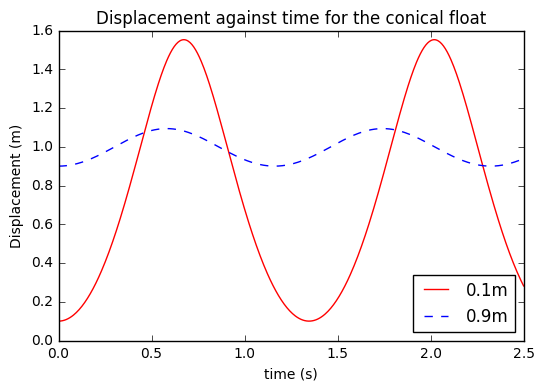

In [7]:
#plot these results on a graph of displacement against time.
pl.plot(x, z1[:,1], label = '0.1m',color ='red')  
pl.plot(x, z2[:,1], '--', label = '0.9m', color ='blue')
pl.title('Displacement against time for the conical float')
pl.xlabel('time (s)')
pl.ylabel('Displacement (m)')
pl.legend(loc='best')
pl.show()

It can be estimated from the graph that, for the initial condition of y0 = 0.1m, the period and ampliteude are approximately 1.35s and 0.8m respectively.
For the initial condition of y0 = 0.9m, the period and amplitude are approximately 1.2s and 0.09m respectively.

In [8]:
#repeat the same steps as previously using the new function.
def fb(x,y):
    f= zeros(2)            
    f[0]= (g*(1.0 - (a*(x[1]))))  
    f[1]= x[0]
    return f

In [9]:
z3= scipy.integrate.odeint(fb,y1,x)
z4= scipy.integrate.odeint(fb,y2,x)

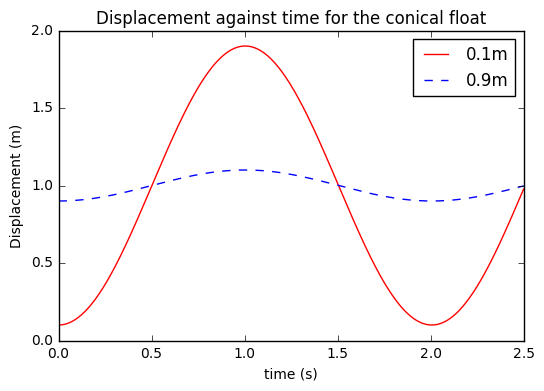

In [10]:
pl.plot(x, z3[:,1], label = '0.1m',color ='red')  
pl.plot(x, z4[:,1], '--', label = '0.9m', color ='blue')
pl.title('Displacement against time for the conical float')
pl.xlabel('time (s)')
pl.ylabel('Displacement (m)')
pl.legend(loc='best')
pl.show()

It can be estimated from the graph that, for the initial condition of y0 = 0.1m, the period and ampliteude are approximately 2.0s and 0.8m respectively.
For the initial condition of y0 = 0.9m, the period and amplitude are approximately 2.0s and 0.1m respectively.

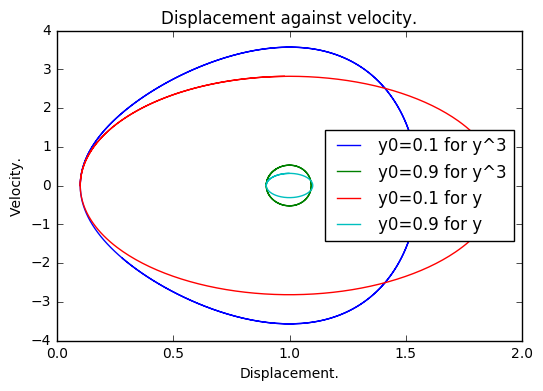

In [11]:
#1)c)
#Plot the displacement against the velocity.
pl.plot(z1[:,1],z1[:,0],label='y0=0.1 for y^3')  
pl.plot(z2[:,1],z2[:,0],label='y0=0.9 for y^3')
pl.plot(z3[:,1],z3[:,0],label='y0=0.1 for y')  
pl.plot(z4[:,1],z4[:,0],label='y0=0.9 for y')
pl.title('Displacement against velocity.')
pl.xlabel('Displacement.')
pl.ylabel('Velocity.')
pl.legend(loc='best')
pl.show()

# Past Paper Question 2013-14

In [1]:
#define a function of the two previously derived first order equations setting them in the same array.
def f(v,t):
    f0 = v[1]
    f1 = (g - ((Cd/m)*(v[1]**2)))
    return [f0,f1]

In [2]:
#Define constants
g =  9.80665
Cd =  0.2028
m = 80

In [5]:
#generate our values for t to integrate over and our initial values for y and y' (displacement and velocity)
t = linspace(0,100,5000)
y0 = [0,0]

In [11]:
#integrate the function using odepack which generates an array of values for y and v.
#the last 2 lines just define y and v as each set of values in z.
z = integrate.odeint(f,y0,t)
y = z[:,0]
v = z[:,1]

In [12]:
pl.plot(t,-y+5000, label='Position')
pl.title('Displacement vs. time of skydiver')
pl.xlabel('time')
pl.ylabel('Displacement from starting position')
pl.ylim(0,5000)
pl.plot()

[]

In [15]:
#finds the point at which y is more than 5000m in the array and gives the minimum value in the array t it is over this number.
#t_end is just calculating the actual value of t based on the parameters of the linspace code above (0-100 over 5000 points)
t0 = nanmin(where(y>5000))
t_end = (t0/5000.)*100
print 'time taken to fall 5000m =', t_end, 'seconds'

time taken to fall 5000m = 84.78 seconds


In [16]:
pl.plot(t,v, label='Velocity')
pl.title('Velocity vs. time of skydiver')
pl.xlabel('time')
pl.ylabel('Velocity')
pl.xlim(0,t_end)
pl.plot()

[]

In [17]:
print 'terminal velocity =', max(v), 'm/s'

terminal velocity = 62.1972747764 m/s
